In [151]:
#Começamos importando algumas bibliotecas que serão úteis para facilitar a visualização e análise dos dados.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns #Ela fornece uma interface para trabalhar gráficos estatísticos atraentes e informativos 
import sweetviz as sv #Fornece ferramentas para realizar analises iniciais e gerar relatórios mais facilmente.

plt.style.use('ggplot') #Facilita a visualização e a torna mais agradável esteticamente.



In [152]:
exports = pd.read_csv("new_df_argentina_limpo.csv")
exports.head()

,Ano,Mes,Pais,Cidade,CodigoSH4,DescricaoSH4,CodigoSH2,DescricaoSH2,Blocoeconomico,ValorFOBUS,PesoLiquido
0,2010.0,1.0,Argentina,Alfenas - MG,901.0,"Coffee, whether or not roasted or decaffeinate...",9.0,"Coffee, tea, maté and spices",South America,56000.0,149069.825059
1,1900.0,1.0,Argentina,Alfenas - MG,901.0,"Coffee, whether or not roasted or decaffeinate...",9.0,"Coffee, tea, maté and spices",Southern Common Market (MERCOSUL),56000.0,155204.897959
2,2010.0,1.0,Argentina,Almirante Tamandaré - PR,3918.0,"Floor coverings of plastics, whether or not se...",39.0,Plastics and articles thereof,South America,4277.0,6036.342105
3,2010.0,1.0,Argentina,Almirante Tamandaré - PR,3918.0,"Floor coverings of plastics, whether or not se...",39.0,Plastics and articles thereof,Southern Common Market (MERCOSUL),4277.0,5887.432432
4,2010.0,1.0,Argentina,Almirante Tamandaré - PR,8466.0,Parts and accessories suitable for use solely ...,84.0,"Nuclear reactors, boilers, machinery and mecha...",South America,250.0,3358.200000


# 2.1 Análise inicial

In [104]:
# O código a seguir baseia-se nas funcionalidades da Biblioteca sweetviz. Dessa forma seremos capazes de gerar um relatório com informações gerais dos dados e tirar os primeiros insights

exports['ValorFOBUS'] = exports['ValorFOBUS'].replace([np.inf, -np.inf], np.nan) #Precisamos rodar esse código para remover valores infinitezimais

my_report = sv.analyze(exports) 
my_report.show_html()


A análise superficial já nos aponta uma distância temporal problemática na coluna ano. A existência de algumas exportações mapeadas em 1900 tornam grande parte das visualizações inútil, já que a presença destes outliers "esticam" o gráfico de forma a torna-lo pouco visual. Assim, seguimos com o seguinte código.

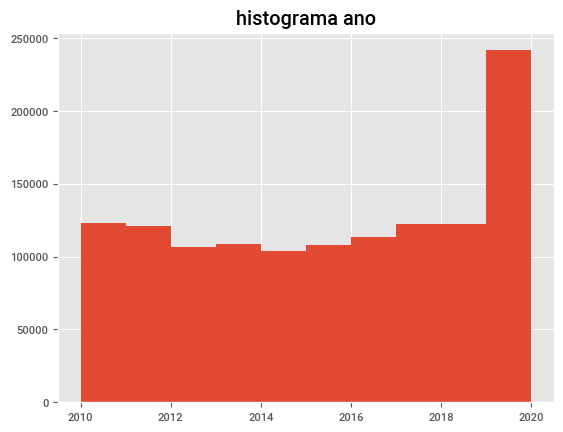

In [155]:
exports = exports.loc[exports['Ano'] > 1930]

_= plt.hist(exports.Ano)
_= plt.title("histograma ano")

De acordo com o gráfico ocorreu as exportações brasileiras para a Argentina seguiram uma espécie de Platô entre 2010 e 2019. Entretando, em 2020 houve um pico no número no comércio entre ambos os países.

In [96]:
exports.Cidade.value_counts()

São Paulo - SP                54428
São Bernardo do Campo - SP    32926
Campinas - SP                 31005
Sorocaba - SP                 30154
Guarulhos - SP                28571
                              ...  
Cáceres - MT                      1
Espigão D'Oeste - RO              1
Guaiúba - CE                      1
São Lourenço do Sul - RS          1
João Neiva - ES                   1
Name: Cidade, Length: 1344, dtype: int64

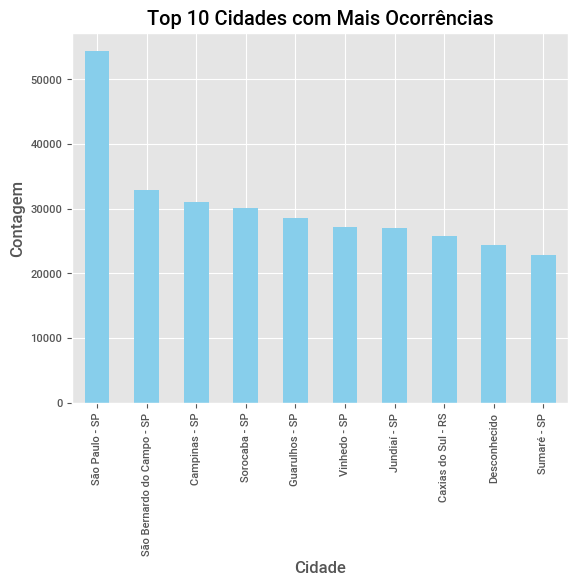

In [97]:
frequencia_cidades = exports['Cidade'].value_counts().head(10)

frequencia_cidades.plot(kind='bar', color='skyblue')

plt.title('Top 10 Cidades que mais exportaram')
plt.xlabel('Cidade')
plt.ylabel('Contagem')

plt.show()

O Gráfico acima representa as cidades que mais tiveram ocorrências de exportação para a Argentina. Destaca-se a concentração massiva de cidades do estado de São Paulo, fato esse que justifica-se, em partes, pela dominância destas cidades em exportações que possuem maior grau de Complementaridade Econômica com a Argentina.

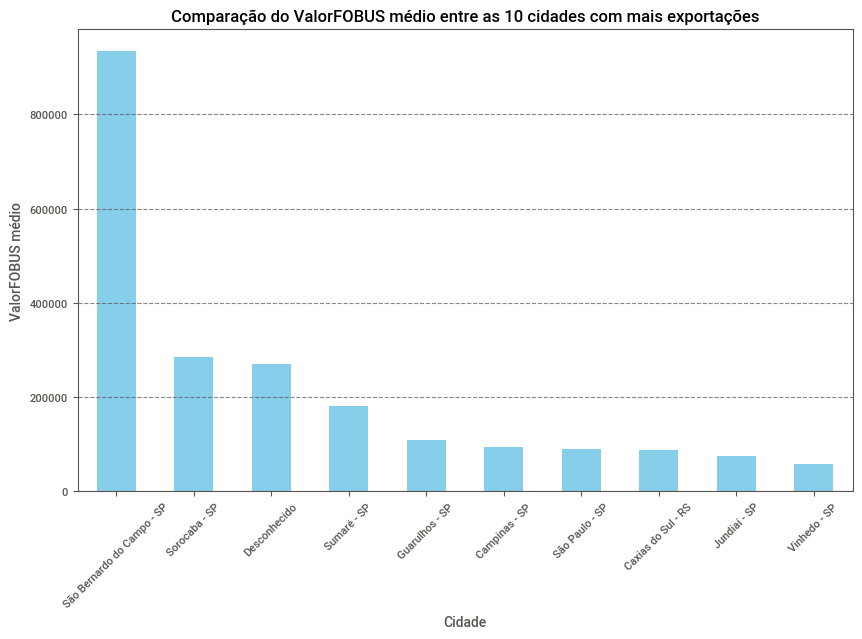

In [134]:

# Supondo que 'exports' seja o seu DataFrame

# 1. Identificando as 10 cidades com mais exportações
top_10_cities = exports['Cidade'].value_counts().head(10).index

# Filtrando o DataFrame para incluir apenas as 10 cidades com mais exportações
top_10_cities_data = exports[exports['Cidade'].isin(top_10_cities)]

# 2. Calculando o ValorFOBUS médio para cada uma dessas cidades
average_valor_fobus = top_10_cities_data.groupby('Cidade')['ValorFOBUS'].mean().sort_values(ascending=False)

# 3. Criando um gráfico de barras para visualizar essas médias
plt.figure(figsize=(10, 6))
average_valor_fobus.plot(kind='bar', color='skyblue')
plt.title('Comparação do ValorFOBUS médio entre as 10 cidades com mais exportações')
plt.ylabel('ValorFOBUS médio')
plt.xlabel('Cidade')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [102]:
exports.DescricaoSH2.value_counts()

Nuclear reactors, boilers, machinery and mechanical appliances; others                  206991
Electrical machinery and equipment and parts thereof; others                            143257
Plastics and articles thereof                                                           114501
Articles of iron or steel                                                                77188
Rubber and articles thereof                                                              55772
                                                                                         ...  
Works of art, collectors' pieces and antiques                                              108
Manufactures of straw, of esparto or of other plaiting materials                            80
Vegetable plaiting materials; Vegetable products not elsewhere specified or included        72
Silk                                                                                        64
Prepared feathers and articles made of feathers or

In [101]:
exports.CodigoSH2.value_counts()

84.0    206991
85.0    143257
39.0    114501
73.0     77188
40.0     55772
         ...  
97.0       108
46.0        80
14.0        72
50.0        64
67.0        34
Name: CodigoSH2, Length: 97, dtype: int64

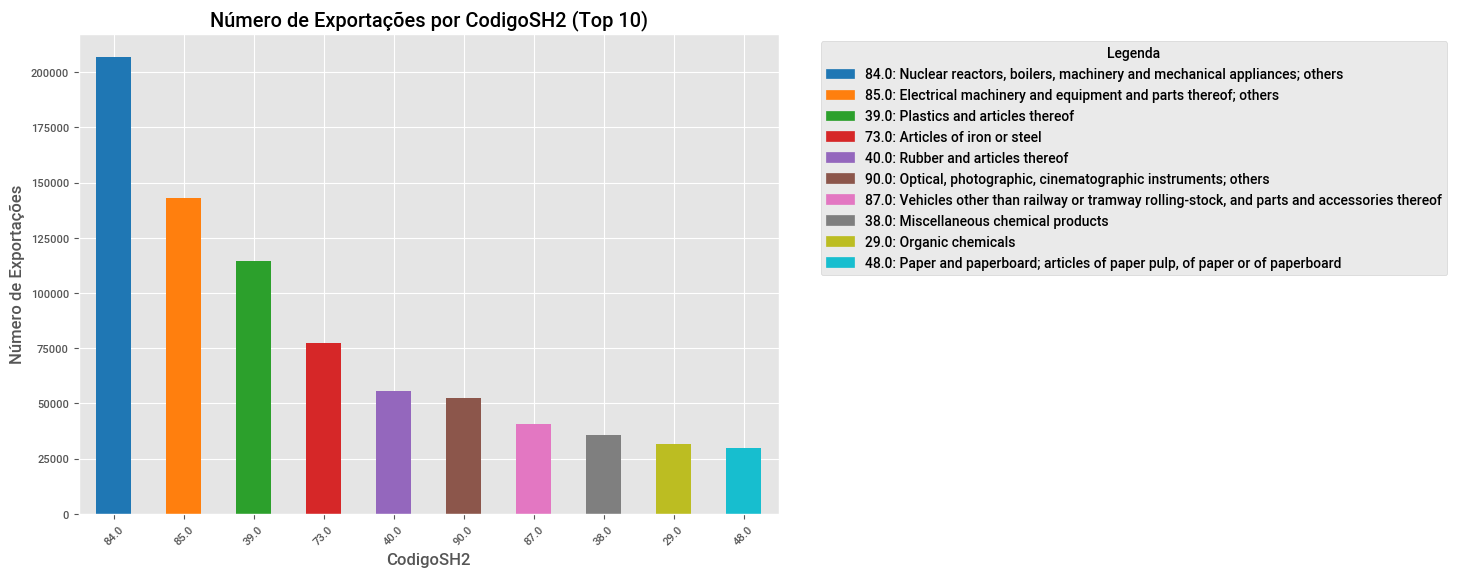

In [103]:
contagem_exportacoes = exports.groupby('CodigoSH2').size()

top_10_exportacoes = contagem_exportacoes.nlargest(10)

mapeamento_descricao = exports.drop_duplicates('CodigoSH2').set_index('CodigoSH2')['DescricaoSH2'].to_dict()

cores = plt.cm.tab10(np.arange(len(top_10_exportacoes)))

fig, ax = plt.subplots(figsize=(10, 6))
top_10_exportacoes.plot(kind='bar', ax=ax, color=cores)

legend_labels = [f'{codigo}: {mapeamento_descricao[codigo]}' for codigo in top_10_exportacoes.index]
handles = [plt.Rectangle((0,0),1,1, color=cores[i]) for i in range(len(top_10_exportacoes))]
ax.legend(handles, legend_labels, title="Legenda", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)

plt.title('Número de Exportações por CodigoSH2 (Top 10)')
plt.xlabel('CodigoSH2')
plt.ylabel('Número de Exportações')

plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

plt.show()


O Gráfico acima demonstra com um pouco mais de detalhes a categoria das exportações realizadas. Interessante notar que, as duas categorias com maior número de exportações baseiam-se em maquinário elétrico/mecânico e suas respectivas partes. Tal fato reforça a presença de cidades do estado de São Paulo entre as que mais exportam, já que estas detêm maior grau de foco em indústrias tecnologicas, como a automotiva.

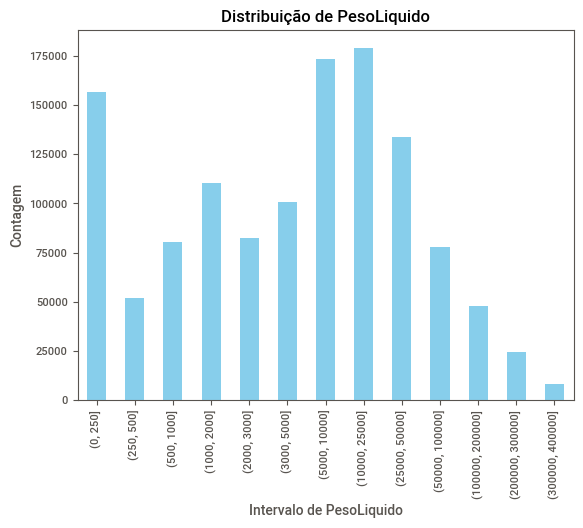

In [109]:
intervalos = [0, 250, 500, 1000, 2000, 3000, 5000, 10000, 25000, 50000, 100000, 200000, 300000, 400000]

exports['Categoria'] = pd.cut(exports['PesoLiquido'], bins=intervalos)

contagem_categorias = exports['Categoria'].value_counts().sort_index()

contagem_categorias.plot(kind='bar', color='skyblue')

plt.title('Distribuição de PesoLiquido')
plt.xlabel('Intervalo de PesoLiquido')
plt.ylabel('Contagem')

plt.show()

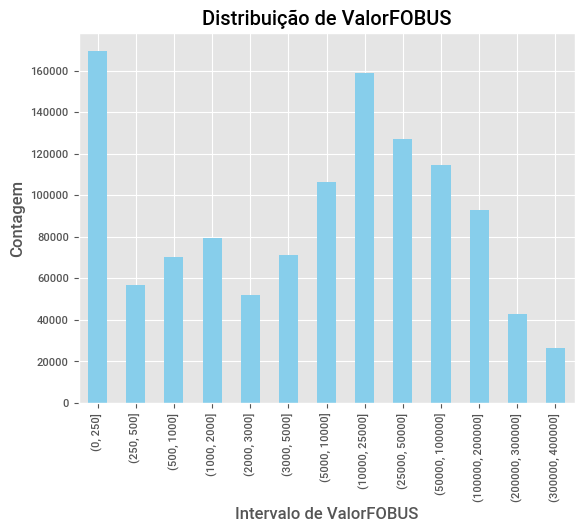

In [99]:
intervalos = [0, 250, 500, 1000, 2000, 3000, 5000, 10000, 25000, 50000, 100000, 200000, 300000, 400000]

exports['Categoria'] = pd.cut(exports['ValorFOBUS'], bins=intervalos)

contagem_categorias = exports['Categoria'].value_counts().sort_index()

contagem_categorias.plot(kind='bar', color='skyblue')

plt.title('Distribuição de ValorFOBUS')
plt.xlabel('Intervalo de ValorFOBUS')
plt.ylabel('Contagem')

plt.show()


O gráfico de distribuição do Peso e o gráfico da distribuição de valor das exportações seguem uma padrão semelhante, ambos possuem uma concentração de exportações baratas e pouco pesadas e por volta do terceiro quartil passam a crescer novamente. A relação entre ambas aponta para um cenário onde as exportações de baixo ValorFOBUS provavelmente mantém essa faixa de valor dévido a serem exportadas em baixa quantidade, o que reduz tanto o próprio peso das mercadorias, quanto o valor. 

Na agricultura, por exemplo, grande parte das exportações é oriunda da agricultura familair, que normalmente não produz produz em grandes quantidades.

In [112]:
media = exports['ValorFOBUS'].mean()
moda = exports['ValorFOBUS'].mode()[0] 
mediana = exports['ValorFOBUS'].median()

print(f'Média: {media:.2f}')
print(f'Moda: {moda}')
print(f'Mediana: {mediana}')

Média: 251057.84
Moda: 1.0
Mediana: 11889.0


In [113]:
media = exports['PesoLiquido'].mean()
moda = exports['PesoLiquido'].mode()[0] 
variancia = exports['PesoLiquido'].median()

# Mostrando os valores
print(f'Média: {media:.2f}')
print(f'Moda: {moda}')
print(f'mediana: {mediana}')

Média: 196712.50
Moda: 0.0
mediana: 11889.0


In [135]:
exports.corr()

,Ano,Mes,CodigoSH4,CodigoSH2,ValorFOBUS,PesoLiquido
Ano,1.000000,0.001680,-0.002440,-0.002495,-0.028709,-0.004810
Mes,0.001680,1.000000,0.000218,0.000205,0.000154,0.000184
CodigoSH4,-0.002440,0.000218,1.000000,0.999971,0.026453,-0.046948
CodigoSH2,-0.002495,0.000205,0.999971,1.000000,0.027017,-0.046845
ValorFOBUS,-0.028709,0.000154,0.026453,0.027017,1.000000,0.238969
PesoLiquido,-0.004810,0.000184,-0.046948,-0.046845,0.238969,1.000000


Como esperado, existe uma relação de cerca de 23% entre as variáveis de ValorFOBUS e PesoLiquido das exportações, reforçando a tese anteriormente citada. Além disso, é provavel que as exportações que envolvam máquinas e peças também fortifiquem a correlação, afinal, dada a composição metálica, normalmente pesam mais, além de requerir mais mão de obra qualificada em seu desenvolvimento, o que eleva o valor agregado das exportações.

Olhando para as demais variáveis, tendo em vista que fatores como ValorFobus e PesoLiquido variam fortemente dentre mais de 13 milhões de exportações, obtivemos pouco ou nenhum grau de correlação relevante entre as demais colunas. A maioria das possíveis correlações navegam entre 2 e 4%.  

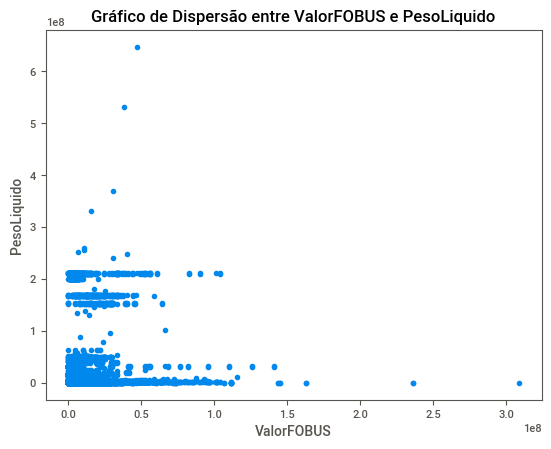

In [115]:
plt.scatter(exports['ValorFOBUS'], exports['PesoLiquido'])
plt.xlabel('ValorFOBUS')
plt.ylabel('PesoLiquido')
plt.title('Gráfico de Dispersão entre ValorFOBUS e PesoLiquido')
plt.show()


Na tentativa de expor a relação entre PesoLiquido e ValorFobus optamos por construir um gráfico de dispersão, entretanto, por conta da ocorrência de alguns outliers a visualização inicial foi fortemente impactada. Dado esse cenário, optamos por realizar a remoção dos outliers via método interquartílico (IQR).

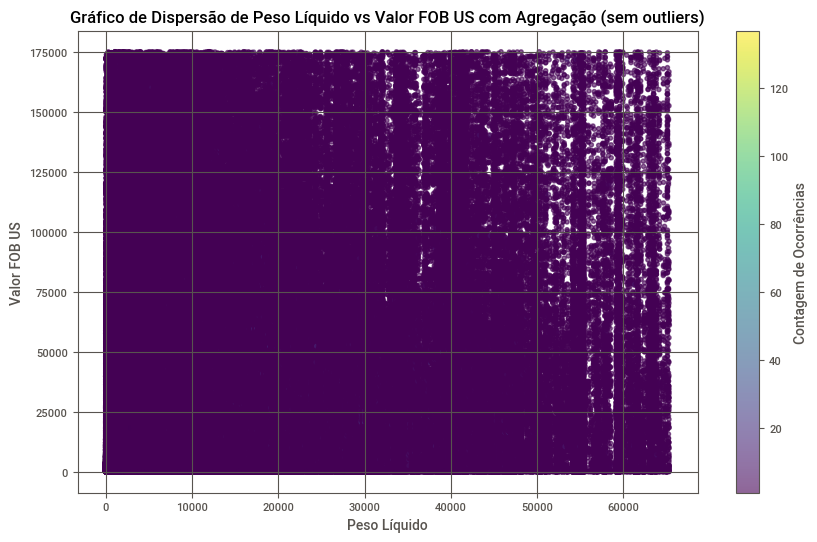

In [127]:
Q1_peso = exports['PesoLiquido'].quantile(0.25)
Q3_peso = exports['PesoLiquido'].quantile(0.75)
IQR_peso = Q3_peso - Q1_peso

Q1_valor = exports['ValorFOBUS'].quantile(0.25)
Q3_valor = exports['ValorFOBUS'].quantile(0.75)
IQR_valor = Q3_valor - Q1_valor

filtered_data = exports[(
    (exports['PesoLiquido'] >= (Q1_peso - 1.5 * IQR_peso)) &
    (exports['PesoLiquido'] <= (Q3_peso + 1.5 * IQR_peso)) &
    (exports['ValorFOBUS'] >= (Q1_valor - 1.5 * IQR_valor)) &
    (exports['ValorFOBUS'] <= (Q3_valor + 1.5 * IQR_valor))
)]

aggregated_data = filtered_data.groupby(['PesoLiquido', 'ValorFOBUS']).size().reset_index(name='counts')

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data=aggregated_data, x='PesoLiquido', y='ValorFOBUS', c='counts', cmap='viridis', alpha=0.6)

colorbar = plt.colorbar(scatter)
colorbar.set_label('Contagem de Ocorrências')

plt.title('Gráfico de Dispersão de Peso Líquido vs Valor FOB US com Agregação (sem outliers)')
plt.xlabel('Peso Líquido')
plt.ylabel('Valor FOB US')
plt.grid(True)
plt.show()







Mesmo com a remoção dos outliers a visualização se mostrava pouco eficiência. Devido ao imenso volume de dados a visualização de dispersão se provou pouco efetiva, já que praticamente todo o espaço em branco é ocupado, impossibilitando a análise de quaisquer tendências ou movimentos. 

Sendo assim, optamos por uma abordagem amostral onde utilizamos um método de aleatorização para selecionar 10.000 amostras, para então, finalmente, construir um gráfico de dispersão.

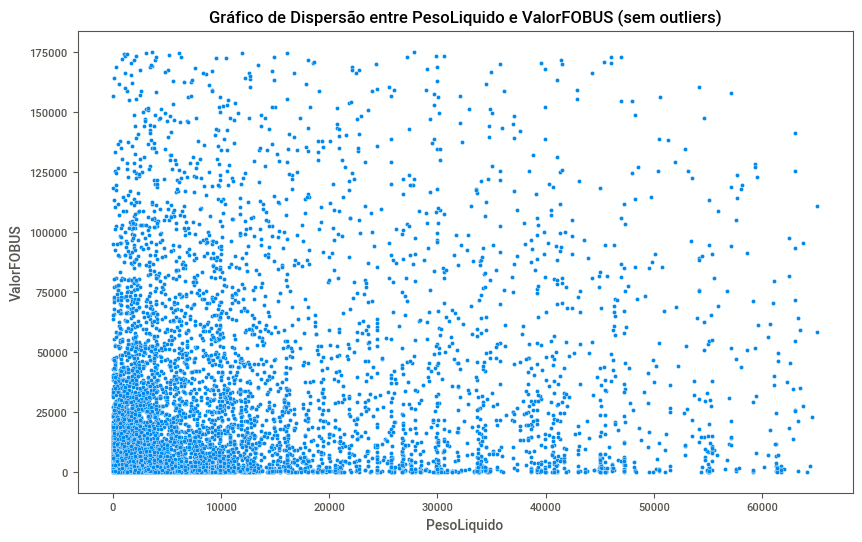

In [131]:

numerical_columns = exports.select_dtypes(include=[np.number])

Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

filtered_data = exports[~((numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR))).any(axis=1)]

sampled_data = filtered_data.sample(n=10000, random_state=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_data, x='PesoLiquido', y='ValorFOBUS')
plt.title('Gráfico de Dispersão entre PesoLiquido e ValorFOBUS (sem outliers)')
plt.xlabel('PesoLiquido')
plt.ylabel('ValorFOBUS')
plt.show()




O gráfico de disperssão reforça expressa a dinâmica de exportações de baixo valor financeiro e baixo peso que se provaram como as mais expressivas em número de exportações para a Argentina. Fora isso, também vemos um agrupamento em exportações de baixo custo e um pouco mais pesadas (até 30.000). Enquanto isso o os itens mais valiosos estão um pouco mais agrupados em PesoLiquido até 10.000.

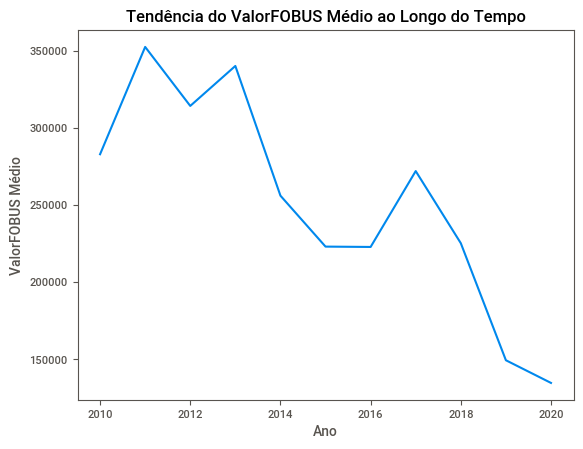

In [121]:
media_valor_por_ano = exports.groupby('Ano')['ValorFOBUS'].mean()
media_valor_por_ano.plot(kind='line')
plt.xlabel('Ano')
plt.ylabel('ValorFOBUS Médio')
plt.title('Tendência do ValorFOBUS Médio ao Longo do Tempo')
plt.show()

A tendência de ValorFobus médio ao longo do tempo, apesar de passar por alguns anos de crescimento, no longo prazo (década) vêm apresentando um decrescimento no período registrado. Como não foi possível indentificar correlação fortes para além do Valor x Peso, a queda nas exportações tende a estar mais relacionada com fatores externos as dinâmicas de exportação; Taxa de Juros, Desempenho da economia interna/global, políticas públicas, disponibilidade dos recursos, flutuação dos preços e até o desenvolvimento da indústria interna.